# How Player Height Affects the NBA
### Analysis Team
*Lindsay Reynolds, Nick Sheets*

In [1]:
#%matplotlib notebook
#take out the hashtag if we will use this

In [2]:
# Set up dependencies and read in csv files needed
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import stats
from scipy.stats import linregress

In [3]:
# Read in stats csv file from data exploration/cleanup process
player_stats_path = os.path.join("Output_files_for_analysis", "player_stats.csv")

nba_stats_df = pd.read_csv(player_stats_path)
nba_stats_df

,Unnamed: 0,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...,...
743,743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [4]:
# Need to drop the extra column of index
del nba_stats_df["Unnamed: 0"]
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [5]:
# Read in csv file including salary from data exploration/cleanup process
nba_stats_with_salary_path = os.path.join("Output_files_for_analysis", "player_stats_with_sal.csv")
nba_stats_with_salary_df = pd.read_csv(nba_stats_with_salary_path)
nba_stats_with_salary_df

,Unnamed: 0,player_name,height (in),pts,reb,ast,college,country,team,2020-21
0,2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,18136364.0
1,4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,2345640.0
2,6,Abdel Nader,78.0,3.500000,1.700000,0.400000,Iowa State,Egypt,BOS,1752950.0
3,8,Al Horford,82.0,13.500000,6.966667,4.633333,Florida,Dominican Republic,BOS,27500000.0
4,10,Al-Farouq Aminu,81.0,9.133333,7.500000,1.366667,Wake Forest,USA,POR,9720900.0
...,...,...,...,...,...,...,...,...,...,...
319,749,Willie Cauley-Stein,84.0,10.933333,6.633333,1.966667,Kentucky,USA,SAC,4000000.0
320,758,Yuta Watanabe,81.0,2.600000,2.100000,0.500000,George Washington,Japan,MEM,321893.0
321,759,Zach Collins,84.0,5.500000,3.750000,0.850000,Gonzaga,USA,POR,5406255.0
322,760,Zach LaVine,77.0,19.766667,4.000000,3.500000,UCLA,USA,MIN,19500000.0


In [6]:
# Need to drop the extra column of index
del nba_stats_with_salary_df["Unnamed: 0"]
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21
0,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,18136364.0
1,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,2345640.0
2,Abdel Nader,78.0,3.500000,1.700000,0.400000,Iowa State,Egypt,BOS,1752950.0
3,Al Horford,82.0,13.500000,6.966667,4.633333,Florida,Dominican Republic,BOS,27500000.0
4,Al-Farouq Aminu,81.0,9.133333,7.500000,1.366667,Wake Forest,USA,POR,9720900.0
...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.0,10.933333,6.633333,1.966667,Kentucky,USA,SAC,4000000.0
320,Yuta Watanabe,81.0,2.600000,2.100000,0.500000,George Washington,Japan,MEM,321893.0
321,Zach Collins,84.0,5.500000,3.750000,0.850000,Gonzaga,USA,POR,5406255.0
322,Zach LaVine,77.0,19.766667,4.000000,3.500000,UCLA,USA,MIN,19500000.0


In [43]:
players_from_nba_stats_df_with_2020_21_salaries = len(nba_stats_with_salary_df)
print (players_from_nba_stats_df_with_2020_21_salaries)

324


In [7]:
# If want to do any work with the stats for each player separated out by the three seasons
# Read in csv file including salary from data exploration/cleanup process
nba_stats_breakout_by_season_path = os.path.join("Output_files_for_analysis", "player_stats_breakout_by_season.csv")
nba_stats_breakout_by_season_df = pd.read_csv(nba_stats_breakout_by_season_path)

# Will be a df of each player with a row for each season of the three seasons examined
nba_stats_breakout_by_season_df

,Unnamed: 0,season,player_name,height (in),height (cm),pts,reb,ast,college,country,team
0,9147,2016-17,AJ Hammons,84.0,213.36,2.2,1.6,0.2,Purdue,USA,DAL
1,9647,2017-18,Aaron Brooks,72.0,182.88,2.3,0.5,0.6,Oregon,USA,MIN
2,9146,2016-17,Aaron Brooks,72.0,182.88,5.0,1.1,1.9,Oregon,USA,IND
3,10628,2018-19,Aaron Gordon,81.0,205.74,16.0,7.4,3.7,Arizona,USA,ORL
4,9145,2016-17,Aaron Gordon,81.0,205.74,12.7,5.1,1.9,Arizona,USA,ORL
...,...,...,...,...,...,...,...,...,...,...,...
1551,9862,2017-18,Zaza Pachulia,83.0,210.82,5.4,4.7,1.6,None,Georgia,GSW
1552,10455,2018-19,Zaza Pachulia,83.0,210.82,3.9,3.9,1.3,None,Georgia,DET
1553,10630,2018-19,Zhaire Smith,76.0,193.04,6.7,2.2,1.7,Texas Tech,USA,PHI
1554,9861,2017-18,Zhou Qi,85.0,215.90,1.2,1.2,0.1,None,China,HOU


### Data Analysis

In [8]:
players = nba_stats_df["player_name"].unique()
print(f"For the seasons examined there are {len(players)} different players.")

For the seasons examined there are 748 different players.


In [9]:
# See general analysis of the stats df including min and max heights
nba_stats_df.describe()

,height (in),pts,reb,ast
count,748.000000,748.000000,748.000000,748.000000
mean,78.868940,7.201604,3.089260,1.617313
std,3.355998,5.464155,2.237994,1.574468
min,69.000000,0.000000,0.000000,0.000000
25%,76.000000,3.300000,1.500000,0.600000
50%,79.000000,5.800000,2.583333,1.100000
75%,81.000000,9.475000,3.950000,2.100000
max,87.000000,31.866667,15.133333,10.466667


##### Observations
* The min height (in) = 69.0 and max height (in) = 87.0.  
* The mean of the heights is approx. 79 inches.  

  
  

In [10]:
# Look at some more stats, including unique values for college and country
nba_stats_df.describe(include="all")

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
count,748,748.000000,748.000000,748.000000,748.000000,748,748,748,748
unique,748,NaN,NaN,NaN,NaN,161,50,30,6
top,Chris Andersen,NaN,NaN,NaN,NaN,None,USA,ATL,"6'7"" - 6'9"""
freq,1,NaN,NaN,NaN,NaN,149,589,30,233
mean,NaN,78.868940,7.201604,3.089260,1.617313,NaN,NaN,NaN,NaN
std,NaN,3.355998,5.464155,2.237994,1.574468,NaN,NaN,NaN,NaN
min,NaN,69.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,76.000000,3.300000,1.500000,0.600000,NaN,NaN,NaN,NaN
50%,NaN,79.000000,5.800000,2.583333,1.100000,NaN,NaN,NaN,NaN
75%,NaN,81.000000,9.475000,3.950000,2.100000,NaN,NaN,NaN,NaN


In [11]:
# Binning the heights
group_names = ["<= 6ft", "6'1\" - 6'3\"", "6'4\" - 6'6\"", "6'7\" - 6'9\"", "6'10\" - 7'", "> 7ft"]
bins = [0, 72, 75, 78, 81, 84, 87]

nba_stats_df["Height Range"] = pd.cut(nba_stats_df["height (in)"], bins, labels=group_names)
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [12]:
binning_nba_heights_df = nba_stats_df.groupby(by = "Height Range").count()["height (in)"].to_frame()

binning_nba_heights_df = binning_nba_heights_df.rename(columns={'height (in)':'player_count'})
binning_nba_heights_df

,player_count
Height Range,
<= 6ft,22
"6'1"" - 6'3""",109
"6'4"" - 6'6""",202
"6'7"" - 6'9""",233
"6'10"" - 7'",161
> 7ft,21


In [13]:
# Update the format of percentages in the following
pd.options.display.float_format = "{:.2f}%".format

In [14]:
# Show number of players for each Height bin and also the percentage of total
binning_nba_heights_df["perc_of_players"] = binning_nba_heights_df / len(players) * 100
binning_nba_heights_df

,player_count,perc_of_players
Height Range,,
<= 6ft,22,2.94%
"6'1"" - 6'3""",109,14.57%
"6'4"" - 6'6""",202,27.01%
"6'7"" - 6'9""",233,31.15%
"6'10"" - 7'",161,21.52%
> 7ft,21,2.81%


##### Observations from the above  
Nearly a third of the NBA players in the data analyzed were between 6'7" and 6'9".  
Around 58% of the NBA players were between 6'4" and 6'9" tall.  
A small number of players are under 6' tall, and about the same number of players are over 7' tall.

In [15]:
pd.options.display.float_format = "{:.2f}".format

In [16]:
# Binning the salaries
group_names_salary = ["< 1M", "1M to 2.4M", "2.5M to 4.9M", "5M to 7.4M", "7.5M to 9.9M", "10M to 14.9M", "15M to 19.9M", "> 20M"]
bins_salary = [0, 1000000, 2500000, 5000000, 7500000, 10000000, 15000000, 20000000, 30000000]

nba_stats_with_salary_df["Salary Range"] = pd.cut(nba_stats_with_salary_df["2020-21"],\
                                                  bins_salary, labels=group_names_salary)
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21,Salary Range
0,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,18136364.00,15M to 19.9M
1,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,2345640.00,1M to 2.4M
2,Abdel Nader,78.00,3.50,1.70,0.40,Iowa State,Egypt,BOS,1752950.00,1M to 2.4M
3,Al Horford,82.00,13.50,6.97,4.63,Florida,Dominican Republic,BOS,27500000.00,> 20M
4,Al-Farouq Aminu,81.00,9.13,7.50,1.37,Wake Forest,USA,POR,9720900.00,7.5M to 9.9M
...,...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.00,10.93,6.63,1.97,Kentucky,USA,SAC,4000000.00,2.5M to 4.9M
320,Yuta Watanabe,81.00,2.60,2.10,0.50,George Washington,Japan,MEM,321893.00,< 1M
321,Zach Collins,84.00,5.50,3.75,0.85,Gonzaga,USA,POR,5406255.00,5M to 7.4M
322,Zach LaVine,77.00,19.77,4.00,3.50,UCLA,USA,MIN,19500000.00,15M to 19.9M


In [47]:
binning_nba_salary_df = nba_stats_with_salary_df.groupby(by = "Salary Range").count()["2020-21"].to_frame()

binning_nba_salary_df = binning_nba_salary_df.rename(columns={'2020-21':'player_count'})
binning_nba_salary_df

,player_count
Salary Range,
< 1M,20
1M to 2.4M,63
2.5M to 4.9M,66
5M to 7.4M,39
7.5M to 9.9M,28
10M to 14.9M,39
15M to 19.9M,22
> 20M,27


In [48]:
pd.options.display.float_format = "{:.2f}%".format

# Show number of players for each Salary bin and also the percentage of total
binning_nba_salary_df["perc_of_players"] = binning_nba_salary_df / len(nba_stats_with_salary_df) * 100


binning_nba_salary_df

,player_count,perc_of_players
Salary Range,,
< 1M,20,6.17%
1M to 2.4M,63,19.44%
2.5M to 4.9M,66,20.37%
5M to 7.4M,39,12.04%
7.5M to 9.9M,28,8.64%
10M to 14.9M,39,12.04%
15M to 19.9M,22,6.79%
> 20M,27,8.33%


##### Observations from the above  
* About 40% of players make between 1M and 5M for 2020-21.

In [18]:
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.00,2.20,1.60,0.20,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.00,3.65,0.80,1.25,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.00,3.45,1.65,0.90,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.00,0.00,0.00,0.00,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.00,14.30,7.45,1.95,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.00,5.13,4.83,1.60,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.00,6.70,2.20,1.70,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [19]:
# change format back to values not percent
pd.options.display.float_format = "{:.2f}".format
nba_stats_df.describe()

,height (in),pts,reb,ast
count,748.00,748.00,748.00,748.00
mean,78.87,7.20,3.09,1.62
std,3.36,5.46,2.24,1.57
min,69.00,0.00,0.00,0.00
25%,76.00,3.30,1.50,0.60
50%,79.00,5.80,2.58,1.10
75%,81.00,9.47,3.95,2.10
max,87.00,31.87,15.13,10.47


In [60]:
# Explore mean, median, mode for heights in nba_stats_df (mean should be 78.87 like above)
heights = nba_stats_df["height (in)"]

mean_heights_numpy = np.mean(heights)                       
print(f"The mean of heights is {mean_heights_numpy}")

print(mean_heights)
# Do the same for median



The mean of heights is 78.86894009572333
79.0


In [ ]:
# Do the same for median

In [57]:
mode_heights_numpy = stats.mode(heights)
print(mode_heights_numpy)


ModeResult(mode=array([81.]), count=array([81]))


In [ ]:
# Plot a histogram of the frequency for each height
# See 05 Matplotlib Day 3 Activity 01 for samples


In [20]:
# define a function that will allow simpler plotting
def show_scatter(x_col, y_col):
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df.iloc[:,y_col]
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    plt.title(plot_title, size=25)
    plt.xlabel(x_label_name, size=20)
    plt.ylabel(y_label_name, size=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.show()
    plt.tight_layout()

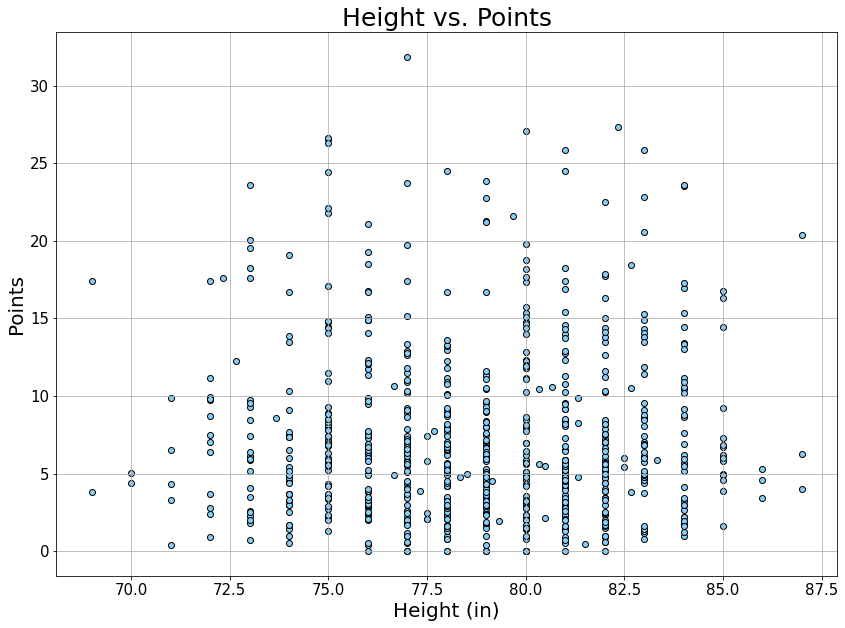

<Figure size 432x288 with 0 Axes>

In [38]:
# Set up then call the function show_scatter using Height and Points
figure1 = plt.figure(figsize=(14,10))

plot_title = "Height vs. Points"
x_label_name = "Height (in)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1
figure1 = show_scatter(1, 2)

In [39]:
# Save and display the chart

# Example
# s_wind_lin_reg_image = os.path.join('..', 'output_data', 'S-LatVsWindWithLinReg.png')
# plt.savefig(s_wind_lin_reg_image)

ht_vs_pts_output_image = os.path.join("Output_files", "Ht_vs_pts.png")
plt.savefig(ht_vs_pts_output_image)
plt.show()


<Figure size 432x288 with 0 Axes>

In [23]:
def calc_linear_reg_show_scatter(x_col, y_col):
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df.iloc[:,y_col]
    
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    plt.title(plot_title, size=25)
    plt.xlabel(x_label_name, size=20)
    plt.ylabel(y_label_name, size=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
       
    
    # For linear regression line, calculate the values and plot the line
    height_slope, height_int, height_r, height_p, height_std_err = stats.linregress(x_values, y_values)
    line_fit = height_slope * x_values + height_int 

    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(height_slope,height_int))
    plt.legend(fontsize=20)

    # Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.show()
    plt.tight_layout()

pearsonr results: (-0.017377411665314996, 0.6351390828365829).
The correlation between these two factors is -0.017.


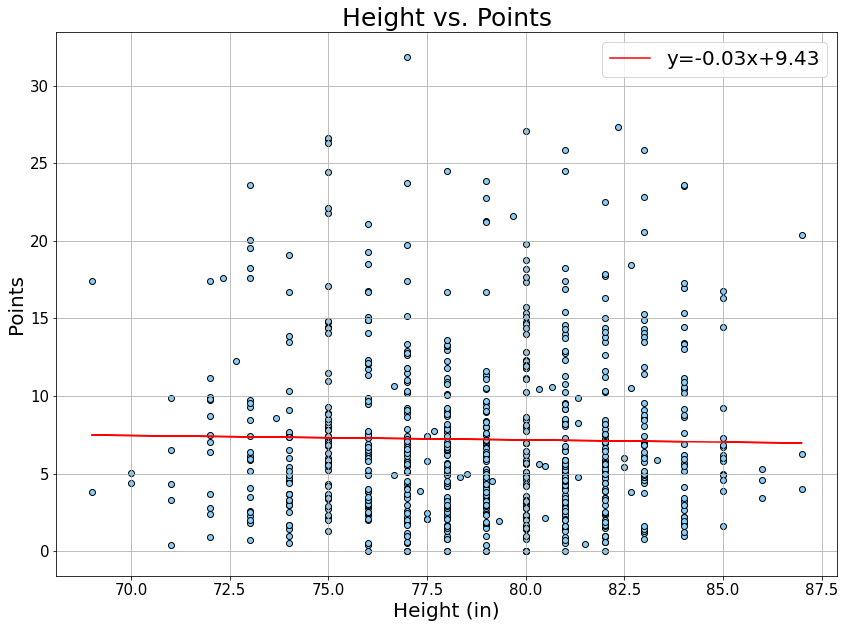

<Figure size 432x288 with 0 Axes>

In [37]:
# Set up then call the function show_scatter using Height and Points
figure1_lin = plt.figure(figsize=(14,10))

plot_title = "Height vs. Points"
x_label_name = "Height (in)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1

figure1_lin = calc_linear_reg_show_scatter(1, 2)

In [41]:
ht_vs_pts_lin_reg_output_image = os.path.join("Output_files", "Ht_vs_pts_lin_reg.png")
plt.savefig(ht_vs_pts_output_image)
plt.show()


<Figure size 432x288 with 0 Axes>

In [64]:
# Explore the same kind of plotting with only half the heights
# One scatter for those less than the mean height, and the other for those greater than the mean height
nba_stats_heights_below_mean_df = nba_stats_df.loc[nba_stats_df["height (in)"] < (mean_heights_numpy)]
nba_stats_heights_below_mean_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
1,Aaron Brooks,72.00%,3.65%,0.80%,1.25%,Oregon,USA,MIN,<= 6ft
3,Aaron Harrison,78.00%,3.45%,1.65%,0.90%,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00%,5.90%,1.30%,1.70%,UCLA,USA,IND,"6'1"" - 6'3"""
5,Aaron Jackson,75.00%,8.00%,3.00%,1.00%,None,USA,HOU,"6'1"" - 6'3"""
6,Abdel Nader,78.00%,3.50%,1.70%,0.40%,Iowa State,Egypt,BOS,"6'4"" - 6'6"""
...,...,...,...,...,...,...,...,...,...
737,Xavier Silas,77.00%,0.00%,1.00%,0.00%,Northern Illinois,USA,BOS,"6'4"" - 6'6"""
739,Yogi Ferrell,72.00%,8.70%,2.30%,2.70%,Indiana,USA,DAL,<= 6ft
742,Zach LaVine,77.00%,19.77%,4.00%,3.50%,UCLA,USA,MIN,"6'4"" - 6'6"""
743,Zach Lofton,76.00%,0.00%,0.00%,0.00%,New Mexico State,USA,DET,"6'4"" - 6'6"""


In [ ]:
# Create nba_stats_heights_above_mean_df  **use >= mean_heights_numpy in formula


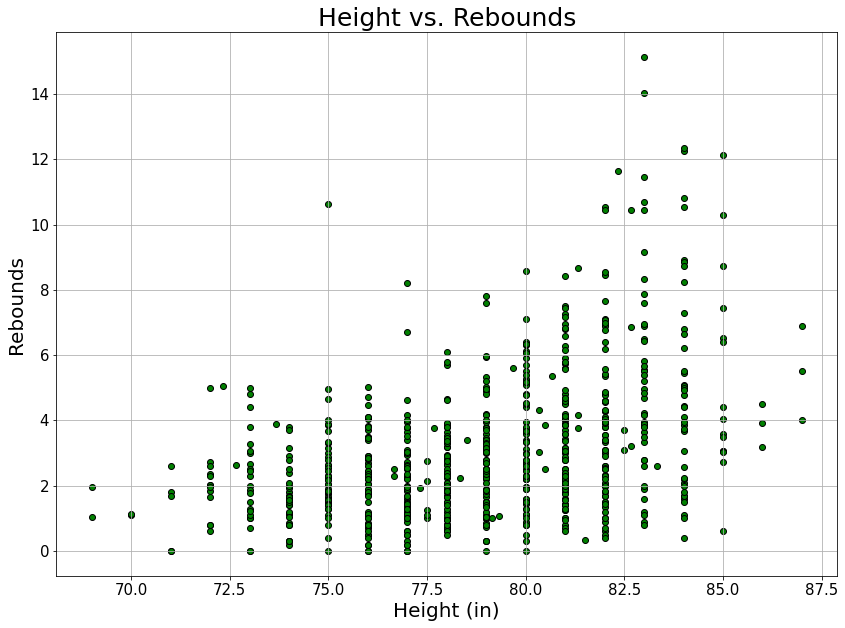

<Figure size 432x288 with 0 Axes>

In [25]:
# Set up then call the function show_scatter using Height and Rebounds
figure2 = plt.figure(figsize=(14,10))

plot_title = "Height vs. Rebounds"
x_label_name = "Height (in)"
y_label_name = "Rebounds"
face = "green"
edge = "black"
alpha_value = 1
show_scatter(1, 3)


In [ ]:
# Create the plot with the linear regression line added

In [ ]:
# Output the plot to the Output_files folder

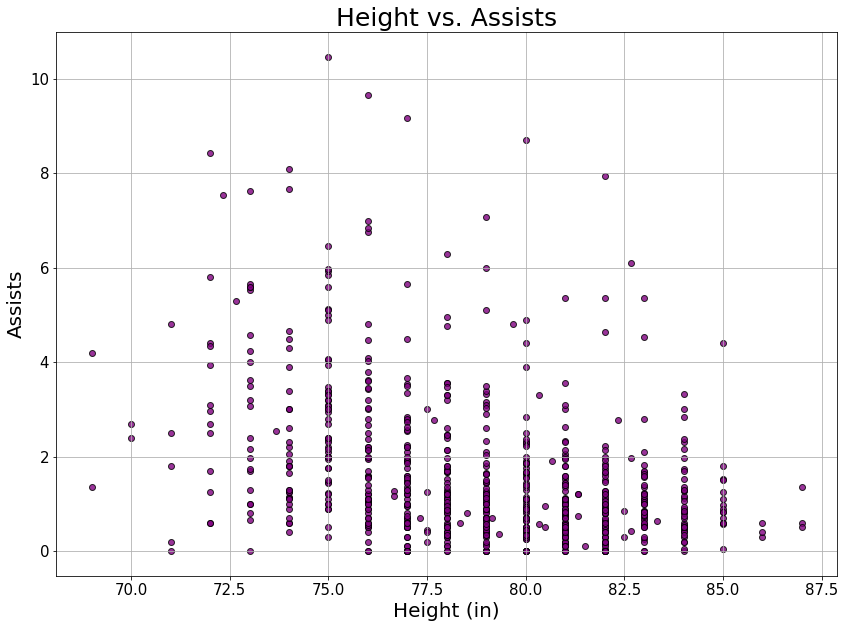

<Figure size 432x288 with 0 Axes>

In [26]:
# Set up then call the function show_scatter using Height and Assists
figure3 = plt.figure(figsize=(14,10))

plot_title = "Height vs. Assists"
x_label_name = "Height (in)"
y_label_name = "Assists"
face = "purple"
edge = "black"
alpha_value = .80
show_scatter(1, 4)

In [ ]:
# Create the plot with the linear regression line added

In [ ]:
# Output the plot to the Output_files folder

In [ ]:
# Want a Height v. salary plot as well (and one with linear regression)

# Want to do salary v. performance as well (so salary v. pts, then salary v. rebounds, 
# and salary v. assists and lin regression for each)



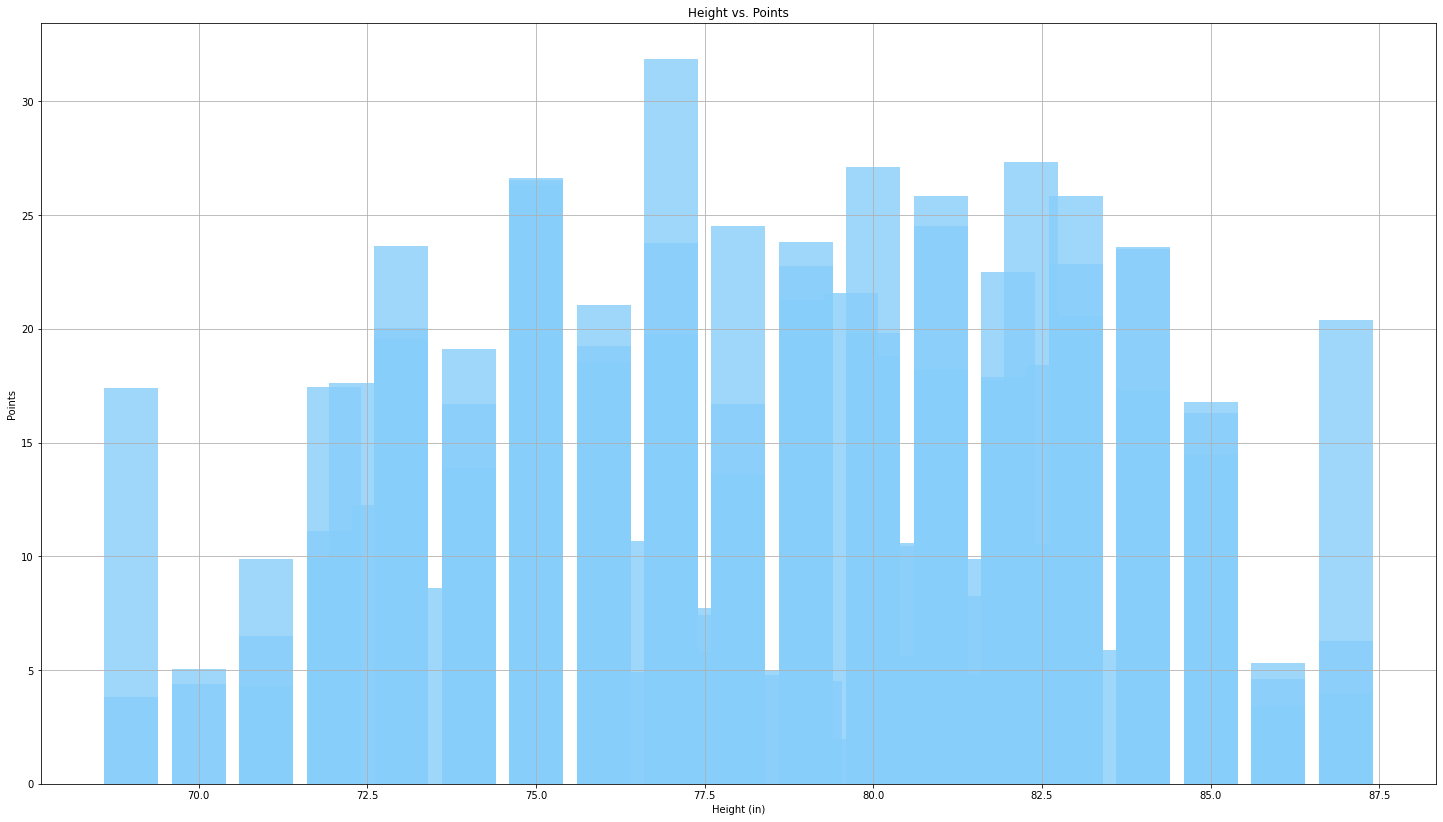

<Figure size 432x288 with 0 Axes>

In [27]:
# The maximum x value for our chart will be about 90
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure2 = plt.figure(figsize=(25,14))

plt.bar(nba_stats_df['height (in)'], nba_stats_df['pts'], color='lightskyblue', alpha=.80, align="center")
plt.title('Height vs. Points')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()